In [1]:
# First, install required packages
# pip install pandas numpy scikit-learn matplotlib seaborn nltk tensorflow keras gradio

import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import gradio as gr


In [2]:
df = pd.read_csv('/content/dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


Target Distribution Pie Chart: Shows the proportion of phishing vs legitimate URLs

URL Length Box Plot: Compares URL lengths between phishing and legitimate sites

Correlation Heatmap: Shows relationships between key numerical features

Subdomain Distribution: Histogram showing number of subdomains by status

Feature Importance Bar Chart: Top 15 features by correlation with target

Protocol Usage Bar Chart: Shows HTTP vs HTTPS usage by status

Digit Ratio Analysis: Box plot and distribution of digit ratio in URLs

Dataset shape: (11430, 89)

First few rows:
                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_

/tmp/ipython-input-552001759.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y='length_url', data=df, palette=colors)


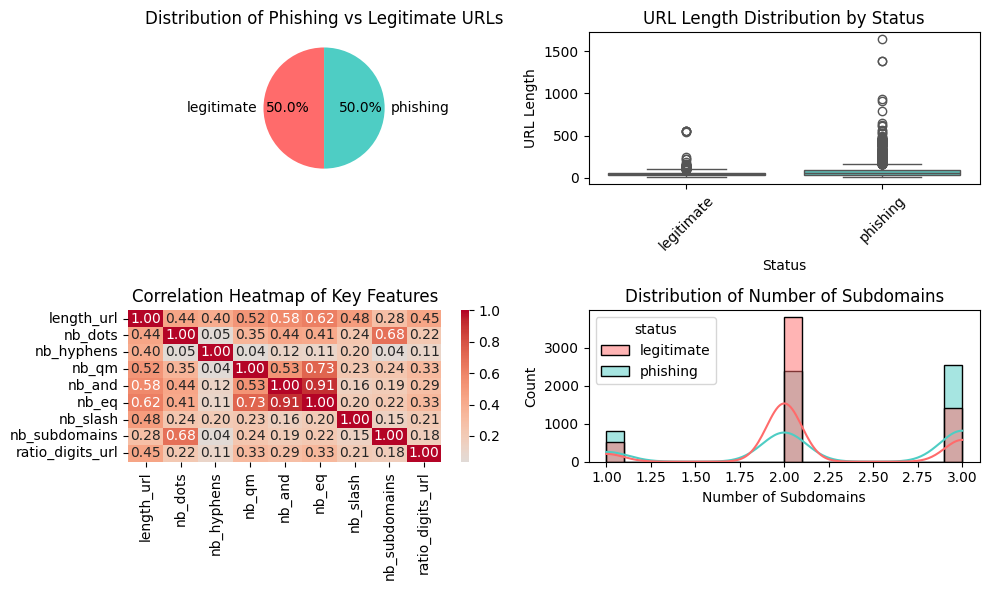

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


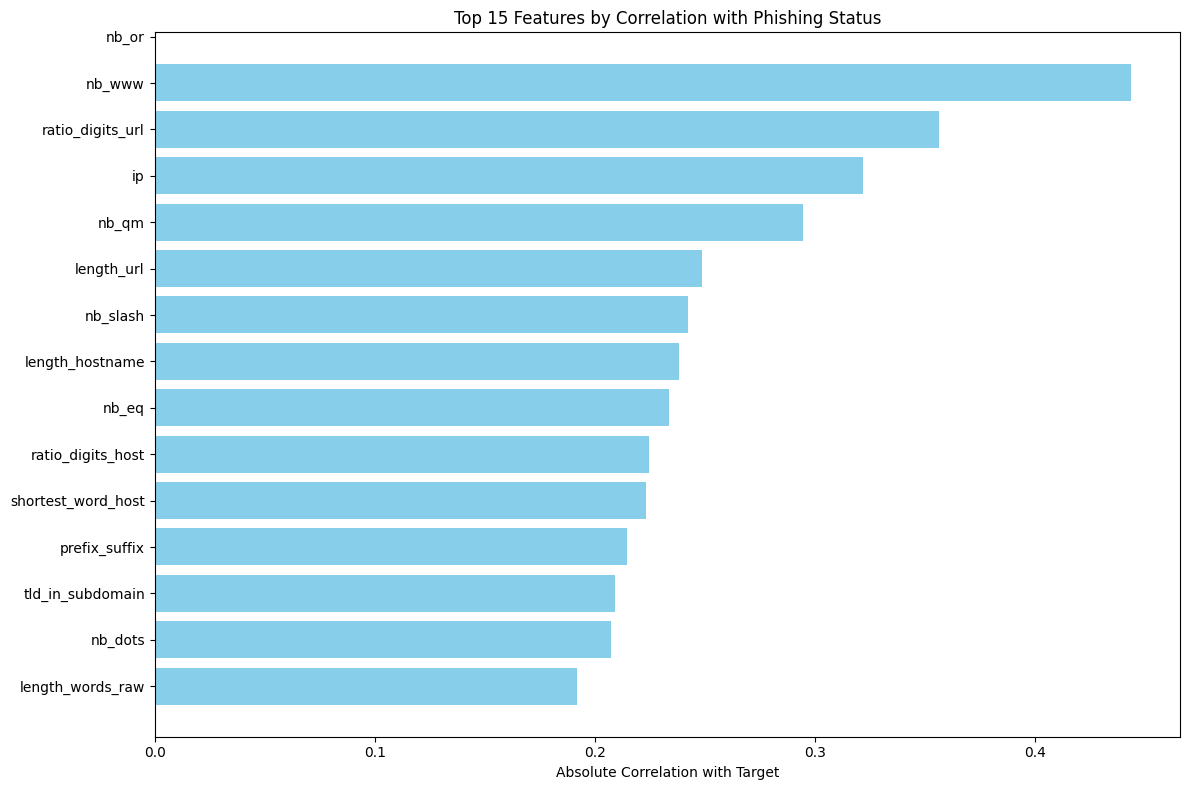

<Figure size 1000x600 with 0 Axes>

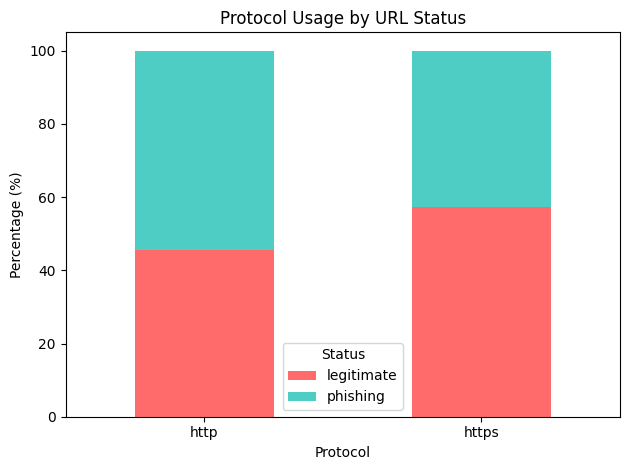

/tmp/ipython-input-552001759.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y='ratio_digits_url', data=df, palette=colors)


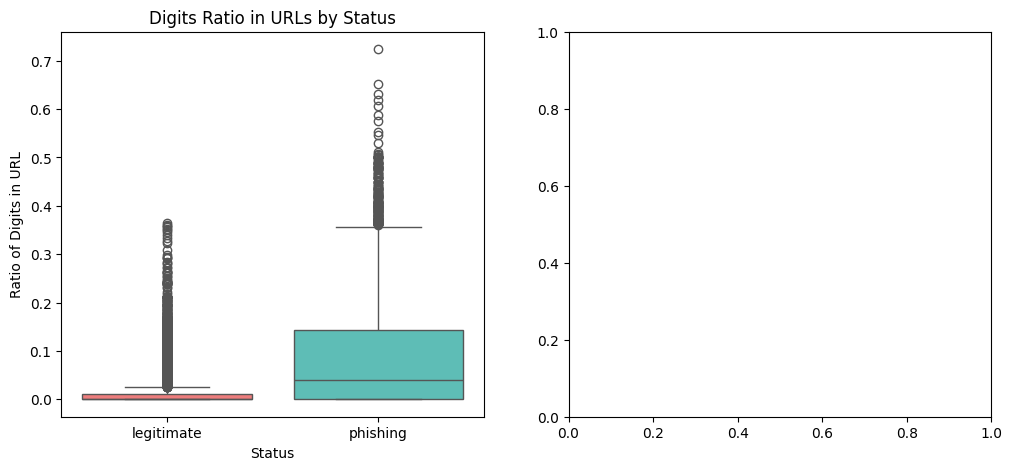

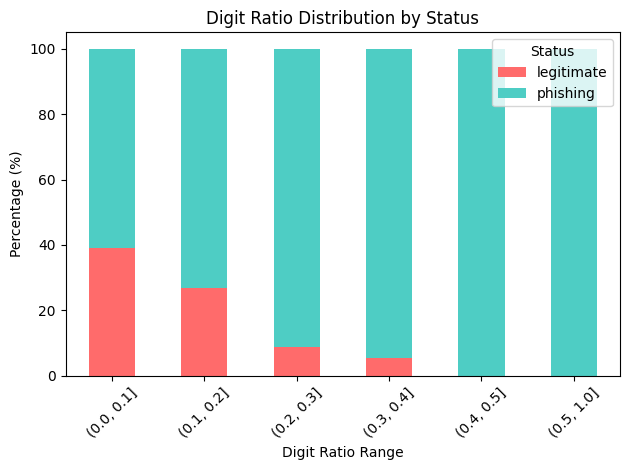


=== Summary Statistics ===
Total URLs: 11430
Phishing URLs: 5715
Legitimate URLs: 5715
Percentage phishing: 50.00%

=== Missing Values ===
digit_ratio_bin    6566
dtype: int64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset


# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

# Plot 1: Distribution of Target Variable (Status)
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
status_counts = df['status'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Phishing vs Legitimate URLs')

# Plot 2: URL Length Distribution by Status
plt.subplot(2, 2, 2)
sns.boxplot(x='status', y='length_url', data=df, palette=colors)
plt.title('URL Length Distribution by Status')
plt.xlabel('Status')
plt.ylabel('URL Length')
plt.xticks(rotation=45)

# Plot 3: Correlation Heatmap of Key Numerical Features
plt.subplot(2, 2, 3)
# Select some key features for correlation
key_features = ['length_url', 'nb_dots', 'nb_hyphens', 'nb_qm', 'nb_and',
                'nb_eq', 'nb_slash', 'nb_subdomains', 'ratio_digits_url']
corr_matrix = df[key_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Heatmap of Key Features')

# Plot 4: Distribution of Number of Subdomains
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='nb_subdomains', hue='status', kde=True, palette=colors, bins=20)
plt.title('Distribution of Number of Subdomains')
plt.xlabel('Number of Subdomains')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot 5: Feature Importance (using correlation with target)
plt.figure(figsize=(12, 8))
# Encode target variable for correlation calculation
le = LabelEncoder()
df['status_encoded'] = le.fit_transform(df['status'])

# Calculate correlation with target for all numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'status_encoded']

correlations = []
for col in numerical_cols:
    if col in df.columns:
        corr = df[col].corr(df['status_encoded'])
        correlations.append((col, abs(corr)))

# Sort by absolute correlation
correlations.sort(key=lambda x: x[1], reverse=True)

# Take top 15 features
top_features = correlations[:15]
feature_names = [f[0] for f in top_features]
corr_values = [f[1] for f in top_features]

plt.barh(range(len(feature_names)), corr_values, color='skyblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Absolute Correlation with Target')
plt.title('Top 15 Features by Correlation with Phishing Status')
plt.gca().invert_yaxis()  # Highest correlation at top
plt.tight_layout()
plt.show()

# Plot 6: Comparison of Protocol Usage (HTTP vs HTTPS)
plt.figure(figsize=(10, 6))
# Extract protocol from URL
df['protocol'] = df['url'].apply(lambda x: 'https' if x.startswith('https') else 'http')
protocol_status = pd.crosstab(df['protocol'], df['status'], normalize='index') * 100

protocol_status.plot(kind='bar', stacked=True, color=['#FF6B6B', '#4ECDC4'])
plt.title('Protocol Usage by URL Status')
plt.xlabel('Protocol')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# Plot 7: Distribution of Digits Ratio in URLs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='status', y='ratio_digits_url', data=df, palette=colors)
plt.title('Digits Ratio in URLs by Status')
plt.xlabel('Status')
plt.ylabel('Ratio of Digits in URL')

plt.subplot(1, 2, 2)
# Create bins for digit ratio
df['digit_ratio_bin'] = pd.cut(df['ratio_digits_url'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0])
digit_ratio_dist = pd.crosstab(df['digit_ratio_bin'], df['status'], normalize='index') * 100
digit_ratio_dist.plot(kind='bar', stacked=True, color=['#FF6B6B', '#4ECDC4'])
plt.title('Digit Ratio Distribution by Status')
plt.xlabel('Digit Ratio Range')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Status')

plt.tight_layout()
plt.show()

# Additional analysis: Summary statistics
print("\n=== Summary Statistics ===")
print(f"Total URLs: {len(df)}")
print(f"Phishing URLs: {len(df[df['status'] == 'phishing'])}")
print(f"Legitimate URLs: {len(df[df['status'] == 'legitimate'])}")
print(f"Percentage phishing: {(len(df[df['status'] == 'phishing']) / len(df) * 100):.2f}%")

# Check for missing values
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if len(missing_values) > 0:
    print(missing_values)
else:
    print("No missing values found!")

In [5]:
# 1. NLP Feature Extraction from URLs
def preprocess_url(url):
    """Extract NLP features from URL"""
    # Convert to lowercase
    url = url.lower()

    # Remove http/https
    url = re.sub(r'^https?://', '', url)

    # Remove www.
    url = re.sub(r'^www\.', '', url)

    # Extract domain
    domain = url.split('/')[0] if '/' in url else url

    # Extract path
    path = '/'.join(url.split('/')[1:]) if '/' in url else ''

    # Tokenization
    tokens = word_tokenize(url.replace('.', ' ').replace('/', ' ').replace('-', ' '))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]

    return {
        'url_length': len(url),
        'domain_length': len(domain),
        'path_length': len(path),
        'num_tokens': len(tokens),
        'avg_token_length': np.mean([len(t) for t in tokens]) if tokens else 0,
        'has_https': 1 if 'https' in df['url'].iloc[0] else 0,  # Approximate
        'has_ip': 1 if re.search(r'\d+\.\d+\.\d+\.\d+', url) else 0,
        'special_chars_count': len(re.findall(r'[^\w\s]', url)),
        'digit_ratio': len(re.findall(r'\d', url)) / len(url) if len(url) > 0 else 0
    }


In [11]:
# Apply NLP feature extraction
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the specific 'punkt_tab' resource
nltk.download('stopwords') # Download the stopwords corpus
print("Extracting NLP features from URLs...")
nlp_features = []
for url in df['url']:
    nlp_features.append(preprocess_url(url))

nlp_df = pd.DataFrame(nlp_features);

# Combine with original features
df_combined = pd.concat([df.drop(['url', 'status'], axis=1), nlp_df], axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Extracting NLP features from URLs...


In [13]:
df_combined

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,digit_ratio_bin,url_length,domain_length,path_length,num_tokens,avg_token_length,has_https,has_ip,special_chars_count,digit_ratio
0,37,19,0,3,0,0,0,0,0,0,...,NaN,26,15,10,4,5.750000,0,0,3,0.000000
1,77,23,1,1,0,0,0,0,0,0,...,"(0.2, 0.3]",70,23,46,5,13.200000,0,0,4,0.242857
2,126,50,1,4,1,0,1,2,0,3,...,"(0.1, 0.2]",118,50,67,11,9.727273,0,0,14,0.161017
3,18,11,0,2,0,0,0,0,0,0,...,NaN,11,11,0,2,3.500000,0,0,2,0.000000
4,55,15,0,2,2,0,0,0,0,0,...,NaN,44,11,32,6,6.333333,0,0,6,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,NaN,34,13,20,4,7.750000,0,0,3,0.000000
11426,84,18,0,5,0,1,1,0,0,1,...,"(0.0, 0.1]",73,14,58,11,5.727273,0,0,11,0.027397
11427,105,16,1,2,6,0,1,0,0,1,...,"(0.1, 0.2]",93,12,80,10,8.100000,0,0,12,0.161290
11428,38,30,0,2,0,0,0,0,0,0,...,NaN,27,26,0,2,12.500000,0,0,2,0.000000


In [15]:

# Prepare features and target
X = df_combined.copy() # Make a copy to avoid modifying the original df_combined
y = df['status']

# Drop the columns that are not features or are non-numeric strings
# 'status_encoded' is the target and should not be in X
# 'protocol' and 'digit_ratio_bin' are string columns introduced for plotting/analysis
columns_to_drop_from_X = ['status_encoded', 'protocol', 'digit_ratio_bin']
X = X.drop(columns=columns_to_drop_from_X, errors='ignore') # Use errors='ignore' in case some are already dropped or don't exist

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # legitimate=0, phishing=1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Machine Learning Models
print("\n=== Training Machine Learning Models ===")

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate models
ml_results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    ml_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['legitimate', 'phishing']))

# 3. Create 5 Plots
print("\n=== Creating Visualizations ===")


=== Training Machine Learning Models ===

Training Random Forest...
Random Forest Accuracy: 0.9654
Classification Report:
              precision    recall  f1-score   support

  legitimate       0.97      0.96      0.97      1143
    phishing       0.96      0.97      0.97      1143

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286


Training SVM...
SVM Accuracy: 0.9563
Classification Report:
              precision    recall  f1-score   support

  legitimate       0.95      0.96      0.96      1143
    phishing       0.96      0.95      0.96      1143

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286


Training Logistic Regression...
Logistic Regression Accuracy: 0.9383
Classification Report:
              precision    recall  f1-score   support

  legitimate  


=== Creating Visualizations ===


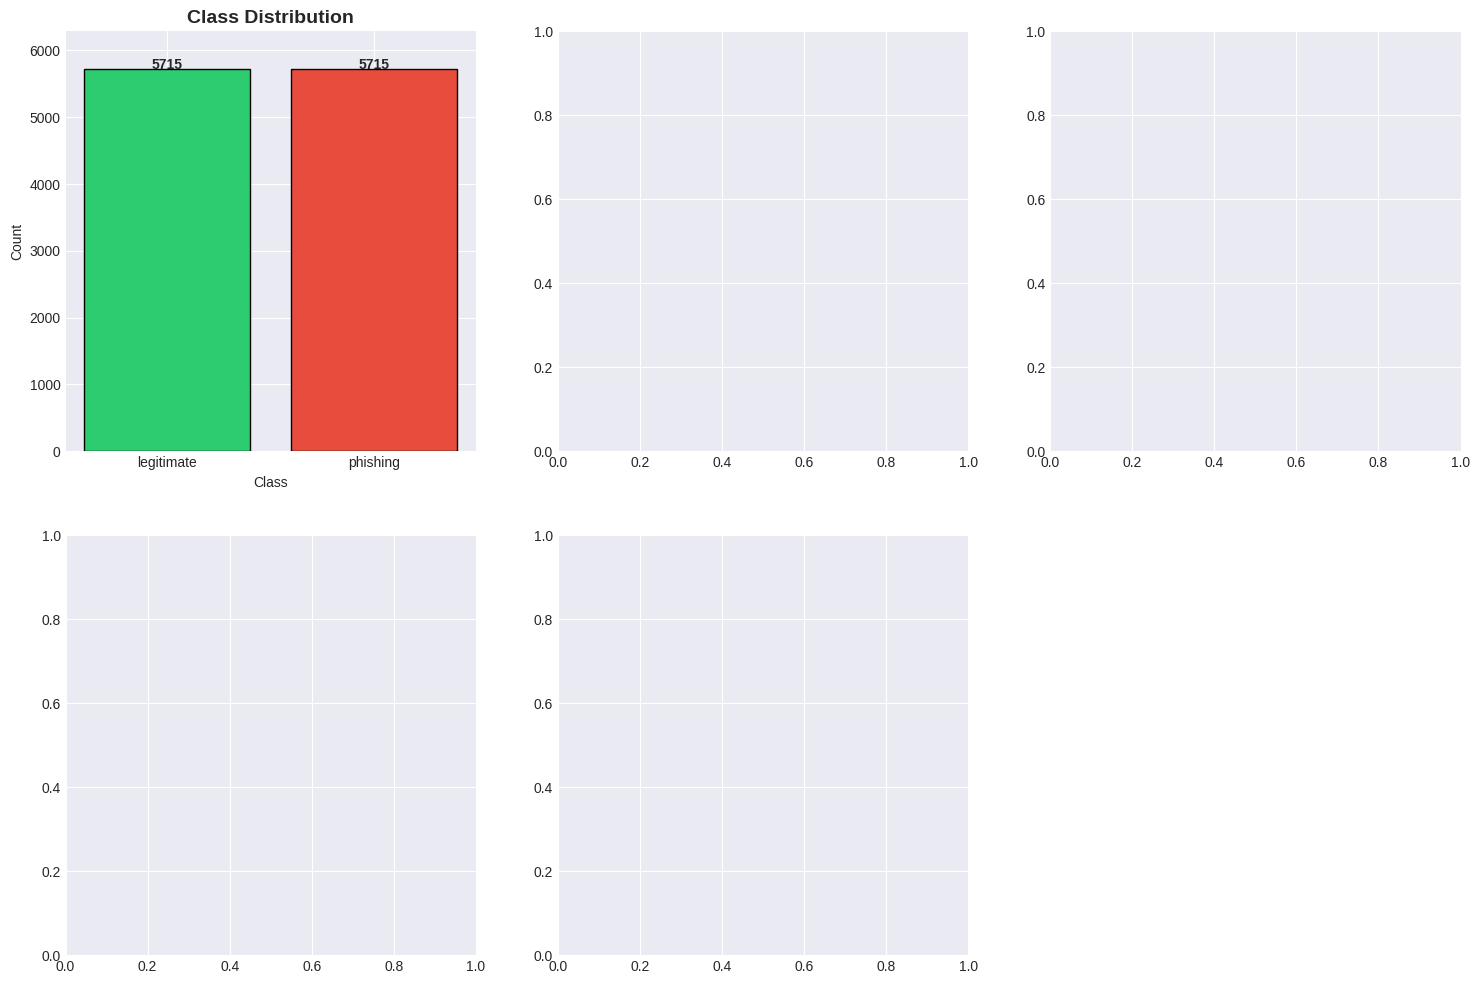

In [16]:
# 3. Create 5 Plots
print("\n=== Creating Visualizations ===")

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.delaxes(axes[1, 2])  # Remove the last subplot

# Plot 1: Class Distribution
ax1 = axes[0, 0]
class_counts = df['status'].value_counts()
colors = ['#2ecc71', '#e74c3c']
ax1.bar(class_counts.index, class_counts.values, color=colors, edgecolor='black')
ax1.set_title('Class Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.set_ylim(0, max(class_counts.values) * 1.1)
for i, v in enumerate(class_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', fontweight='bold')

In [17]:

# 4. Artificial Neural Network (ANN)
print("\n=== Training Artificial Neural Network ===")

# Build ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


=== Training Artificial Neural Network ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train ANN
print("Training ANN...")
history = ann_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate ANN
ann_loss, ann_accuracy, ann_precision, ann_recall = ann_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nANN Results:")
print(f"Accuracy: {ann_accuracy:.4f}")
print(f"Precision: {ann_precision:.4f}")
print(f"Recall: {ann_recall:.4f}")

Training ANN...
Epoch 1/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8123 - loss: 0.4061 - precision: 0.7993 - recall: 0.8444 - val_accuracy: 0.9546 - val_loss: 0.1347 - val_precision: 0.9554 - val_recall: 0.9544
Epoch 2/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9412 - loss: 0.1636 - precision: 0.9411 - recall: 0.9414 - val_accuracy: 0.9568 - val_loss: 0.1347 - val_precision: 0.9647 - val_recall: 0.9490
Epoch 3/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9467 - loss: 0.1460 - precision: 0.9511 - recall: 0.9431 - val_accuracy: 0.9623 - val_loss: 0.1190 - val_precision: 0.9671 - val_recall: 0.9577
Epoch 4/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9562 - loss: 0.1172 - precision: 0.9579 - recall: 0.9540 - val_accuracy: 0.9606 - val_loss: 0.1156 - val_precision: 0.9609 - val_recall: 0.9609
Epoch 5/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9583 - loss: 0.1096 - precision: 0.9547 - recall: 0.9594 - val_accuracy: 0.963

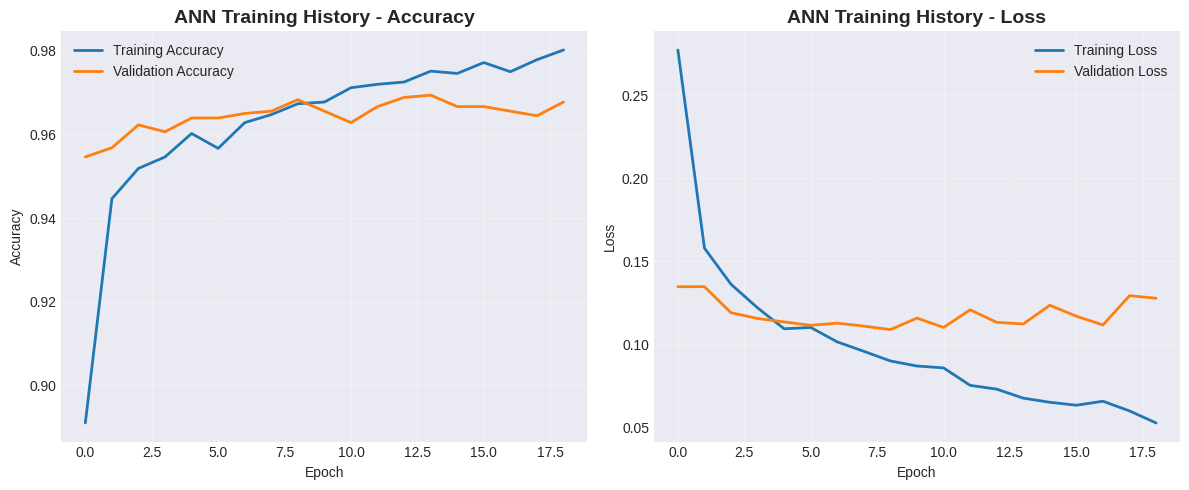

In [19]:
# Plot ANN training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('ANN Training History - Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('ANN Training History - Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ann_training_history.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# 5. Gradio Deployment Interface
print("\n=== Creating Gradio Deployment Interface ===")

def extract_features_from_input(url):
    """Extract features from input URL for prediction"""
    # Basic features
    features = {}

    # Length features
    features['length_url'] = len(url)
    features['length_hostname'] = len(url.split('/')[2]) if '//' in url else len(url.split('/')[0])

    # Protocol features
    features['https_token'] = 1 if url.startswith('https') else 0
    features['http_in_path'] = 1 if 'http' in url.lower() else 0

    # Character counts
    features['nb_dots'] = url.count('.')
    features['nb_hyphens'] = url.count('-')
    features['nb_slash'] = url.count('/')
    features['nb_qm'] = url.count('?')
    features['nb_eq'] = url.count('=')
    features['nb_and'] = url.count('&')

    # Digit ratio
    digits = sum(c.isdigit() for c in url)
    features['ratio_digits_url'] = digits / len(url) if len(url) > 0 else 0

    # Check for IP
    features['ip'] = 1 if re.search(r'\d+\.\d+\.\d+\.\d+', url) else 0

    # Check for suspicious patterns
    features['suspecious_tld'] = 1 if any(tld in url.lower() for tld in ['.tk', '.ml', '.ga', '.cf', '.gq']) else 0
    features['shortening_service'] = 1 if any(service in url.lower() for service in ['bit.ly', 'tinyurl', 'goo.gl', 'ow.ly']) else 0

    # Additional NLP features
    nlp_feats = preprocess_url(url)

    # Combine all features
    all_features = {}

    # Start with default values for all columns
    for col in df_combined.columns:
        all_features[col] = 0

    # Update with actual values
    for key, value in features.items():
        if key in all_features:
            all_features[key] = value

    for key, value in nlp_feats.items():
        if key in all_features:
            all_features[key] = value

    # Convert to DataFrame
    input_df = pd.DataFrame([all_features])

    # Ensure column order matches training
    input_df = input_df[X.columns]

    return input_df

def predict_phishing(url, model_choice):
    """Predict if URL is phishing or legitimate"""

    # Extract features
    input_features = extract_features_from_input(url)

    # Scale features
    input_scaled = scaler.transform(input_features)

    # Make prediction based on selected model
    if model_choice == "Random Forest":
        prediction = ml_results['Random Forest']['model'].predict(input_scaled)[0]
        proba = ml_results['Random Forest']['model'].predict_proba(input_scaled)[0]
    elif model_choice == "SVM":
        prediction = ml_results['SVM']['model'].predict(input_scaled)[0]
        proba = ml_results['SVM']['model'].predict_proba(input_scaled)[0]
    elif model_choice == "Logistic Regression":
        prediction = ml_results['Logistic Regression']['model'].predict(input_scaled)[0]
        proba = ml_results['Logistic Regression']['model'].predict_proba(input_scaled)[0]
    else:  # ANN
        prediction_proba = ann_model.predict(input_scaled, verbose=0)[0][0]
        prediction = 1 if prediction_proba > 0.5 else 0
        proba = [1 - prediction_proba, prediction_proba]

    # Get result
    result = "🚨 PHISHING URL" if prediction == 1 else "✅ LEGITIMATE URL"

    # Create explanation
    explanation = f"""
    **Analysis Results:**

    📊 **Prediction:** {result}

    🔢 **Confidence Scores:**
    - Legitimate: {proba[0]*100:.1f}%
    - Phishing: {proba[1]*100:.1f}%

    📝 **URL Analysis:**
    - URL Length: {len(url)} characters
    - Uses HTTPS: {'Yes' if url.startswith('https') else 'No'}
    - Contains IP address: {'Yes' if re.search(r'\d+\.\d+\.\d+\.\d+', url) else 'No'}
    - Number of dots: {url.count('.')}
    - Suspicious patterns detected: {sum([1 for pattern in ['.tk', '.ml', '.ga', '.cf', 'bit.ly'] if pattern in url.lower()])}

    ⚠️ **Warning:** This is a prediction based on machine learning. Always exercise caution with unfamiliar URLs!
    """

    return result, explanation

# Create Gradio interface
iface = gr.Interface(
    fn=predict_phishing,
    inputs=[
        gr.Textbox(
            label="Enter URL to analyze",
            placeholder="https://example.com or http://suspicious-site.com",
            lines=1
        ),
        gr.Radio(
            choices=["Random Forest", "SVM", "Logistic Regression", "ANN"],
            value="Random Forest",
            label="Select Prediction Model"
        )
    ],
    outputs=[
        gr.Textbox(label="Prediction Result"),
        gr.Markdown(label="Detailed Analysis")
    ],
    title="🔍 Phishing URL Detection System",
    description="""This system uses machine learning and NLP to detect phishing URLs.
    Enter a URL below and select a model to analyze it for phishing attempts.""",
    examples=[
        ["http://www.crestonwood.com/router.php", "Random Forest"],
        ["http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4", "ANN"],
        ["https://www.google.com", "SVM"],
        ["http://secureupdate.appleld.com.duilawyeryork.com/ap/88b142e778d73f7", "Logistic Regression"]
    ],
    theme=gr.themes.Soft(),
    allow_flagging="never"
)

# Summary of results
print("\n" + "="*60)
print("SUMMARY OF RESULTS")
print("="*60)
print("\nMachine Learning Models:")
for name, result in ml_results.items():
    print(f"  {name}: {result['accuracy']:.4f} accuracy")

print(f"\nArtificial Neural Network:")
print(f"  ANN: {ann_accuracy:.4f} accuracy")

best_ml_model = max(ml_results, key=lambda x: ml_results[x]['accuracy'])
print(f"\n📈 Best ML Model: {best_ml_model} ({ml_results[best_ml_model]['accuracy']:.4f})")

if ann_accuracy > ml_results[best_ml_model]['accuracy']:
    print("🏆 Best Overall Model: ANN")
else:
    print(f"🏆 Best Overall Model: {best_ml_model}")

print("\n" + "="*60)
print("Starting Gradio Interface...")
print("The web interface will open in your browser.")
print("You can also access it at: http://localhost:7861")
print("="*60)

# Launch Gradio interface
iface.launch(share=False, server_name="0.0.0.0", server_port=7861)


=== Creating Gradio Deployment Interface ===


/usr/local/lib/python3.12/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(



SUMMARY OF RESULTS

Machine Learning Models:
  Random Forest: 0.9654 accuracy
  SVM: 0.9563 accuracy
  Logistic Regression: 0.9383 accuracy

Artificial Neural Network:
  ANN: 0.9576 accuracy

📈 Best ML Model: Random Forest (0.9654)
🏆 Best Overall Model: Random Forest

Starting Gradio Interface...
The web interface will open in your browser.
You can also access it at: http://localhost:7861
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>